# Training and making prediction for a single allele

## Load packages

Note that if you have installed the epinb package, then you do not need (and probably won't want) to run `sys.path.append("..")`.

In [1]:
import sys
sys.path.append("..")

import epinb

import pandas as pd

## Read in training data

The training data we used are from [Keskin et al.](https://www.nature.com/articles/s41587-019-0322-9) You can substitute it with any data, be they your house data or other public data.

In [2]:
training_data = pd.read_csv("../data/keskin/Keskin peptide lists filtered.csv")
training_data

,Allele,Length,Peptide
0,A0101,8,ADMGHLKY
1,A0101,8,ELDDTLKY
2,A0101,8,FSDNIEFY
3,A0101,8,FTELAILY
4,A0101,8,GLDEPLLK
...,...,...,...
186459,G0104,24,SASSLGGGFGGGSRGFGGASGGGY
186460,G0104,26,GSGGSSYGSGGGSYGSGGGGGGHGSY
186461,G0104,27,LLLPLLLLLLLLLGAGVPGAWGQAGSL
186462,G0104,27,QEESLRQEYAATTSRRSSGSSCNSTRR


## Train the model

As an example, we train a model for A0203.

In [3]:
model = epinb.NBScore() # Create a model.
model = model.fit(training_data.loc[training_data['Allele'] == 'A0203', 'Peptide'])

## Read in the test data

The test data are curated from IEDB. The positive examples are the experimentally verified binders. The negative examples are randomly generated from the source proteins. The ratio of positive to negative data is 1:99.

In [4]:
test_data = pd.read_csv("../data/test-data/IEDB-A0203.txt", header=None, names=["peptide", 'label'])
test_data

,peptide,label
0,FGGHIRSV,pos
1,YLNSVVQV,pos
2,ILHDVVEV,pos
3,ALGSVVAV,pos
4,FLATIMGV,pos
...,...,...
259595,LVPDYGMSNLT,neg
259596,LLGEATEGRIS,neg
259597,NCKCLKTLSVS,neg
259598,LLTRGDMRECV,neg


## Make the prediction

We use `predict_log_odds` to make the predicion.

In [5]:
res = model.predict_log_odds(test_data['peptide'])
res

array([ 10.50781303,  40.28167703,  41.24288408, ..., -35.1040942 ,
        -5.85900102, -35.84848082])

## Interpretation

### 1st-order motifs

First, we can inspect the trained model by looking at the scoring matrices. First of all, we can check the 1st order motifs by using `fit_details_1`.

In [6]:
model.fit_details_1().round(3)

,1,2,3,4,5,7,8,9,0
A,0.139,0.009,0.164,0.052,0.051,0.011,0.098,0.076,0.093
C,0.002,0.000,0.000,0.002,0.005,0.001,0.007,0.007,0.003
D,0.000,0.000,0.002,0.157,0.038,0.003,0.012,0.013,0.000
E,0.002,0.000,0.003,0.187,0.060,0.009,0.062,0.111,0.001
F,0.111,0.001,0.131,0.012,0.065,0.023,0.010,0.024,0.003
G,0.075,0.002,0.017,0.089,0.086,0.017,0.023,0.075,0.001
H,0.021,0.000,0.025,0.016,0.077,0.004,0.031,0.022,0.001
I,0.055,0.070,0.107,0.013,0.078,0.217,0.048,0.011,0.113
K,0.051,0.001,0.139,0.040,0.086,0.010,0.058,0.074,0.000
L,0.068,0.737,0.020,0.022,0.084,0.298,0.126,0.046,0.246


To see the log odds for an AA at a given location, use `what='log_odds'`.

In [7]:
model.fit_details_1(what='log_odds').round(3)

,1,2,3,4,5,7,8,9,0
A,0.579,-2.159,0.749,-0.400,-0.415,-1.963,0.227,-0.020,0.178
C,-1.891,-6.002,-3.604,-2.289,-1.206,-2.958,-0.750,-0.750,-1.491
D,-4.821,-4.821,-3.505,1.083,-0.320,-2.824,-1.512,-1.417,-7.219
E,-3.500,-5.034,-3.169,1.045,-0.092,-2.034,-0.060,0.527,-4.387
F,1.006,-3.516,1.170,-1.178,0.465,-0.585,-1.385,-0.502,-2.687
G,0.077,-3.552,-1.395,0.253,0.217,-1.418,-1.085,0.087,-4.050
H,-0.077,-6.371,0.108,-0.328,1.221,-1.756,0.315,-0.041,-3.326
I,-0.069,0.174,0.596,-1.526,0.279,1.299,-0.204,-1.654,0.652
K,-0.148,-4.290,0.846,-0.396,0.367,-1.809,-0.027,0.221,-4.937
L,-0.339,2.037,-1.557,-1.483,-0.139,1.132,0.274,-0.739,0.942


### 2nd order motifs

Similarly, you can check the frequencies, log odds, and the difference between the frequency and the expected values without correlation $P(ab) - P(a)P(b)$.

In [8]:
model.fit_details_2().round(3)

,20,12,57,23,10,90,35,80,30,24,37,34,58,89,45,38,78,49,79,15
AA,0.0,0.002,0.001,0.001,0.016,0.009,0.011,0.011,0.015,0.001,0.004,0.011,0.007,0.006,0.003,0.016,0.001,0.005,0.001,0.007
AC,0.0,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
AD,0.0,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.001,0.000,0.019,0.000,0.001,0.002,0.003,0.000,0.001,0.000,0.004
AE,0.0,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.001,0.001,0.033,0.004,0.009,0.003,0.006,0.000,0.004,0.001,0.008
AF,0.0,0.000,0.000,0.003,0.000,0.000,0.013,0.001,0.000,0.000,0.003,0.003,0.001,0.005,0.004,0.002,0.000,0.001,0.000,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YS,0.0,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.001,0.000,0.000,0.006,0.003,0.001,0.001,0.006,0.001,0.000,0.001,0.005
YT,0.0,0.002,0.000,0.000,0.002,0.000,0.002,0.000,0.000,0.000,0.003,0.003,0.002,0.001,0.000,0.006,0.000,0.001,0.002,0.001
YV,0.0,0.005,0.004,0.000,0.037,0.015,0.003,0.007,0.042,0.000,0.016,0.002,0.001,0.001,0.001,0.007,0.002,0.000,0.000,0.009
YW,0.0,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [9]:
model.fit_details_2('log_odds').round(3)

,20,12,57,23,10,90,35,80,30,24,37,34,58,89,45,38,78,49,79,15
AA,-2.663,-1.347,-1.627,-1.627,0.958,0.337,0.612,0.577,0.908,-1.627,-0.446,0.577,0.081,0.020,-0.798,0.982,-2.017,-0.265,-1.627,0.137
AC,-3.462,-3.462,-3.462,-3.462,-3.462,-0.417,-0.028,-1.064,0.252,-3.462,-3.462,-3.462,-1.064,-3.462,-3.462,-1.064,-3.462,-1.064,-3.462,-1.064
AD,-4.678,-2.281,-4.678,-4.678,-4.678,-4.678,-0.284,-4.678,-4.678,-1.244,-4.678,1.538,-2.281,-1.634,-0.568,-0.416,-4.678,-1.244,-4.678,0.031
AE,-4.892,-4.892,-4.892,-4.892,-4.892,-4.892,0.057,-2.494,-4.892,-1.847,-1.458,1.866,-0.182,0.551,-0.629,0.126,-2.494,-0.182,-1.458,0.412
AF,-4.409,-4.409,-4.409,-0.015,-2.012,-4.409,1.422,-0.975,-4.409,-4.409,0.101,-0.015,-0.975,0.386,0.300,-0.478,-4.409,-0.975,-4.409,1.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YS,-4.032,-4.032,-1.635,-4.032,-1.635,-4.032,0.843,-4.032,-0.598,-4.032,-4.032,0.985,0.230,-0.988,-0.988,0.985,-0.598,-1.635,-0.988,0.763
YT,-3.800,-0.086,-3.800,-3.800,-0.086,-3.800,0.132,-3.800,-1.402,-3.800,0.595,0.463,0.132,-0.366,-3.800,1.217,-1.402,-0.755,-0.086,-0.366
YV,-3.993,0.882,0.622,-3.993,2.854,1.976,0.402,1.149,3.002,-3.993,2.026,-0.061,-0.559,-0.559,-0.948,1.260,-0.279,-3.993,-3.993,1.450
YW,-2.261,-2.261,-2.261,-2.261,-2.261,-2.261,1.850,-2.261,-2.261,-2.261,-2.261,0.784,-2.261,-2.261,0.137,-2.261,-2.261,0.137,-2.261,0.137


In [10]:
model.fit_details_2('surplus').round(4)

,20,12,57,23,10,90,35,80,30,24,37,34,58,89,45,38,78,49,79,15
AA,-0.0004,0.0003,0.0006,-0.0003,0.0030,0.0015,0.0028,0.0018,-0.0001,0.0007,0.0021,0.0023,0.0016,-0.0012,0.0000,0.0003,-0.0003,0.0007,0.0003,-0.0001
AC,-0.0000,0.0000,-0.0000,-0.0000,-0.0005,0.0005,0.0004,0.0000,0.0010,-0.0000,-0.0001,-0.0003,0.0000,-0.0007,-0.0002,-0.0008,-0.0001,0.0000,-0.0001,-0.0003
AD,0.0000,0.0003,-0.0002,-0.0000,0.0000,0.0000,-0.0032,0.0000,0.0000,-0.0002,-0.0005,-0.0063,-0.0002,-0.0005,0.0003,0.0008,-0.0001,0.0005,-0.0001,-0.0011
AE,-0.0000,-0.0001,-0.0004,-0.0000,-0.0001,-0.0001,-0.0044,0.0003,-0.0001,-0.0009,-0.0002,0.0028,0.0011,-0.0019,-0.0004,-0.0043,-0.0003,-0.0015,-0.0000,-0.0005
AF,-0.0000,-0.0002,-0.0012,0.0019,0.0000,-0.0002,0.0026,0.0009,-0.0004,-0.0001,-0.0002,0.0011,0.0006,0.0023,0.0009,0.0003,-0.0001,-0.0001,-0.0003,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YS,0.0000,-0.0002,-0.0000,0.0000,0.0001,-0.0001,0.0006,-0.0000,0.0008,0.0000,-0.0013,-0.0016,0.0002,-0.0004,0.0003,-0.0020,0.0004,-0.0007,-0.0003,0.0006
YT,0.0000,0.0005,-0.0009,0.0000,0.0010,-0.0002,-0.0011,-0.0001,-0.0002,0.0000,0.0005,-0.0010,-0.0008,-0.0001,-0.0003,-0.0027,-0.0004,-0.0004,0.0004,-0.0017
YV,0.0000,0.0002,-0.0021,0.0000,-0.0084,-0.0025,-0.0030,0.0013,-0.0058,0.0000,-0.0025,0.0001,-0.0014,0.0007,0.0001,-0.0006,0.0008,-0.0004,-0.0004,0.0032
YW,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0010,0.0000,0.0000,0.0000,-0.0001,0.0003,-0.0001,-0.0000,0.0003,-0.0003,-0.0000,0.0004,-0.0000,-0.0008


You can also order the table by the values and look at the top ones by using the argument `topk`. It will return two tables, one for the amino acid combinations, and one for the values.

In [11]:
motifs = model.fit_details_2('log_odds', topk=5)
display(*motifs)

,20,12,57,23,10,90,35,80,30,24,37,34,58,89,45,38,78,49,79,15
0,LV,FL,HI,LF,FV,QV,FH,QV,FV,LP,FP,YP,HQ,HQ,PH,YH,IQ,EQ,LQ,FH
1,MV,YL,HL,LY,YV,TV,FG,HV,YV,LE,YP,FP,HT,HT,DH,FK,IT,PQ,IT,YH
2,LL,SL,HV,LK,SV,SV,YH,VV,AV,LD,KI,FD,HL,RQ,EH,FH,IH,PT,VQ,SH
3,LI,AL,HP,LA,AV,EV,AH,RV,KV,MP,YL,KD,FH,QQ,PW,FT,IS,DQ,IQ,AH
4,IV,TL,NI,LI,GV,KV,SH,TV,IV,LN,FL,KE,WV,SQ,EK,YQ,LQ,DE,IS,FW


,20,12,57,23,10,90,35,80,30,24,37,34,58,89,45,38,78,49,79,15
0,3.968404,2.995305,2.618943,3.133074,2.959139,2.944130,2.528115,2.531336,3.121548,3.144728,2.876409,2.806752,2.049579,1.560612,2.506171,1.700219,1.862923,2.101606,2.167193,2.305801
1,3.323167,2.989770,2.405264,2.996197,2.854202,2.881966,2.122911,2.455499,3.002108,3.123856,2.448491,2.460102,1.818278,1.532253,2.154133,1.628834,1.851526,2.094137,2.081669,2.102378
2,3.115853,2.785283,2.182888,2.846397,2.733449,2.759961,2.102378,2.445432,2.727398,3.026109,2.408002,2.209447,1.697751,1.408893,2.078523,1.616795,1.841238,2.005926,1.969686,2.084538
3,2.733461,2.594956,1.755693,2.817257,2.576541,2.476866,2.001333,2.439247,2.679017,2.366761,2.353638,2.140911,1.696202,1.383627,1.943675,1.609359,1.819307,1.971862,1.960324,1.940892
4,2.528408,2.180415,1.727443,2.440064,2.324494,2.306427,1.955743,2.413481,2.672438,2.244819,2.225964,2.085642,1.487226,1.371914,1.838149,1.553519,1.720833,1.855554,1.946959,1.586144


You can easily consolidate the two tables.

In [12]:
motifs[0] + ' ' + motifs[1].round(2).astype(str)

,20,12,57,23,10,90,35,80,30,24,37,34,58,89,45,38,78,49,79,15
0,LV 3.97,FL 3.0,HI 2.62,LF 3.13,FV 2.96,QV 2.94,FH 2.53,QV 2.53,FV 3.12,LP 3.14,FP 2.88,YP 2.81,HQ 2.05,HQ 1.56,PH 2.51,YH 1.7,IQ 1.86,EQ 2.1,LQ 2.17,FH 2.31
1,MV 3.32,YL 2.99,HL 2.41,LY 3.0,YV 2.85,TV 2.88,FG 2.12,HV 2.46,YV 3.0,LE 3.12,YP 2.45,FP 2.46,HT 1.82,HT 1.53,DH 2.15,FK 1.63,IT 1.85,PQ 2.09,IT 2.08,YH 2.1
2,LL 3.12,SL 2.79,HV 2.18,LK 2.85,SV 2.73,SV 2.76,YH 2.1,VV 2.45,AV 2.73,LD 3.03,KI 2.41,FD 2.21,HL 1.7,RQ 1.41,EH 2.08,FH 1.62,IH 1.84,PT 2.01,VQ 1.97,SH 2.08
3,LI 2.73,AL 2.59,HP 1.76,LA 2.82,AV 2.58,EV 2.48,AH 2.0,RV 2.44,KV 2.68,MP 2.37,YL 2.35,KD 2.14,FH 1.7,QQ 1.38,PW 1.94,FT 1.61,IS 1.82,DQ 1.97,IQ 1.96,AH 1.94
4,IV 2.53,TL 2.18,NI 1.73,LI 2.44,GV 2.32,KV 2.31,SH 1.96,TV 2.41,IV 2.67,LN 2.24,FL 2.23,KE 2.09,WV 1.49,SQ 1.37,EK 1.84,YQ 1.55,LQ 1.72,DE 1.86,IS 1.95,FW 1.59


If you want all combinations sorted, simply use `topk=400`.

In [13]:
motifs = model.fit_details_2('log_odds', topk=400)
motifs[0] + ' ' + motifs[1].round(2).astype(str)

,20,12,57,23,10,90,35,80,30,24,37,34,58,89,45,38,78,49,79,15
0,LV 3.97,FL 3.0,HI 2.62,LF 3.13,FV 2.96,QV 2.94,FH 2.53,QV 2.53,FV 3.12,LP 3.14,FP 2.88,YP 2.81,HQ 2.05,HQ 1.56,PH 2.51,YH 1.7,IQ 1.86,EQ 2.1,LQ 2.17,FH 2.31
1,MV 3.32,YL 2.99,HL 2.41,LY 3.0,YV 2.85,TV 2.88,FG 2.12,HV 2.46,YV 3.0,LE 3.12,YP 2.45,FP 2.46,HT 1.82,HT 1.53,DH 2.15,FK 1.63,IT 1.85,PQ 2.09,IT 2.08,YH 2.1
2,LL 3.12,SL 2.79,HV 2.18,LK 2.85,SV 2.73,SV 2.76,YH 2.1,VV 2.45,AV 2.73,LD 3.03,KI 2.41,FD 2.21,HL 1.7,RQ 1.41,EH 2.08,FH 1.62,IH 1.84,PT 2.01,VQ 1.97,SH 2.08
3,LI 2.73,AL 2.59,HP 1.76,LA 2.82,AV 2.58,EV 2.48,AH 2.0,RV 2.44,KV 2.68,MP 2.37,YL 2.35,KD 2.14,FH 1.7,QQ 1.38,PW 1.94,FT 1.61,IS 1.82,DQ 1.97,IQ 1.96,AH 1.94
4,IV 2.53,TL 2.18,NI 1.73,LI 2.44,GV 2.32,KV 2.31,SH 1.96,TV 2.41,IV 2.67,LN 2.24,FL 2.23,KE 2.09,WV 1.49,SQ 1.37,EK 1.84,YQ 1.55,LQ 1.72,DE 1.86,IS 1.95,FW 1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,AS -4.95,EA -4.89,SG -4.83,KL -5.01,EA -4.89,LD -4.89,EG -4.77,SG -4.83,LT -4.93,TL -4.93,EA -4.89,EA -4.89,PD -4.17,II -4.51,YL -4.36,EG -4.77,AD -4.68,VI -4.63,GK -4.68,EV -4.74
396,KL -5.01,AE -4.89,AE -4.89,EL -5.1,LT -4.93,AE -4.89,ES -4.78,LR -4.88,LK -5.01,GA -4.94,VA -4.91,LI -5.0,EF -4.24,AP -4.56,VP -4.4,GE -4.77,DA -4.68,LP -4.77,AD -4.68,PL -4.77
397,LK -5.01,AG -4.94,EA -4.89,GL -5.16,AG -4.94,AG -4.94,GS -4.83,LD -4.89,LE -5.1,EL -5.1,LK -5.01,LK -5.01,PE -4.39,GV -4.79,FA -4.41,GG -4.83,EG -4.77,AI -4.79,GV -4.79,ES -4.78
398,EL -5.1,AS -4.95,AS -4.95,SL -5.16,LE -5.1,LG -5.16,DL -4.89,AG -4.94,LG -5.16,GL -5.16,LE -5.1,EL -5.1,VD -4.53,GG -4.83,RE -4.5,LD -4.89,GG -4.83,IA -4.79,EA -4.89,EA -4.89


## Evaluation

To evaluate the results, we need some utilities from scikit-learn. To install, in your terminal, activate the virtual environment you are running for this note book, and run `conda install scikit-learn`.

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve
import matplotlib.pyplot as plt
import bisect

In [15]:
test_data['prediction'] = res
test_data

,peptide,label,prediction
0,FGGHIRSV,pos,10.507813
1,YLNSVVQV,pos,40.281677
2,ILHDVVEV,pos,41.242884
3,ALGSVVAV,pos,25.334613
4,FLATIMGV,pos,39.310739
...,...,...,...
259595,LVPDYGMSNLT,neg,-34.499987
259596,LLGEATEGRIS,neg,-31.344300
259597,NCKCLKTLSVS,neg,-35.104094
259598,LLTRGDMRECV,neg,-5.859001


In [16]:
fpr, tpr, roc_thresholds = roc_curve(test_data.label, test_data['prediction'], 
                                     pos_label='pos')
auroc = auc(fpr, tpr)

precision, recall, pr_thresholds = precision_recall_curve(test_data.label, test_data['prediction'], 
                                     pos_label='pos')

ind_40_tpr = bisect.bisect(tpr, 0.4) # fpr = recall
def fpr_tpr_to_precision(fpr, tpr, neg_pos_ratio):
    return tpr / (neg_pos_ratio * fpr + tpr)
prec_at_40_tpr = fpr_tpr_to_precision(fpr[ind_40_tpr], tpr[ind_40_tpr], 99)
    
print(f"AUROC: {auroc:.4f}; Precision at 40% recall: {prec_at_40_tpr:.4f}")

AUROC: 0.9943; Precision at 40% recall: 0.9146


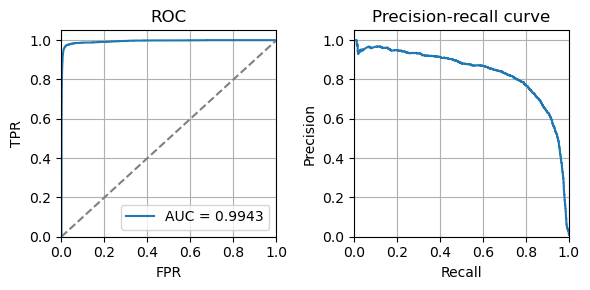

In [17]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)

plt.plot(fpr, tpr, label = "AUC = %0.4f" % auroc)
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.grid('both')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC")
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label = "AUC = %0.4f" % auroc)
plt.grid('both')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-recall curve")

plt.tight_layout()

## Visualization

For visualization, we need two additional packages: `logomaker` for motif logo and `wordcloud` for word clouds.

### Logo plots

We use logo plots for 1st order motifs

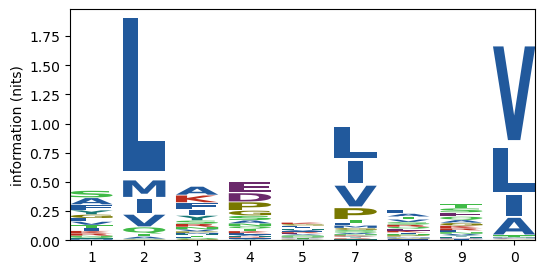

In [18]:
import logomaker
from scipy.stats import entropy

temp = model.fit_details_1().T.reset_index(drop=True)
temp = temp * (3 - entropy(temp.T).reshape([-1, 1]))

fig, ax = plt.subplots(1, 1, figsize=[6, 3])
ww_logo = logomaker.Logo(temp,
                         color_scheme='NajafabadiEtAl2017',
                        ax=ax,
                         vpad=.1,
                         width=.8)
ww_logo.ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 7, 8, 9, 0])
ww_logo.ax.set_ylabel('information (nits)')
# ww_logo.ax.set_ylim([0, 3])
display(ww_logo)

### Word clouds 

We use word clouds for 2nd order motifs

(-0.5, 799.5, 374.5, -0.5)

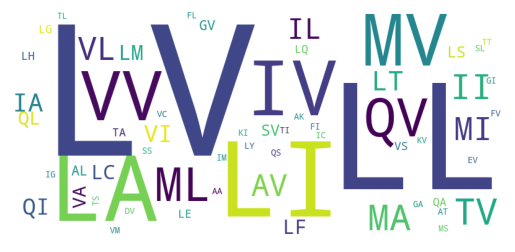

In [19]:
import wordcloud

wc = wordcloud.WordCloud(width = 800, height = 375, min_font_size = 10, background_color ='white', collocations=False)
wc.fit_words(model.fit_details_2()['20'].to_dict())
plt.imshow(wc)
plt.axis("off")